# Threshold bias (part I)

In [1]:
%pylab inline
# set the size of figures below
pylab.rcParams['figure.figsize'] = (5, 3)
from scipy.stats import norm

Populating the interactive namespace from numpy and matplotlib


We will look at a toy model to describe galaxy bias:
- The distribution of density fluctuations is described by a Gaussian d, with <d>=0 and <d^2>=1
- We choose a density threshold nu, and those cells with d>nu will host a galaxy


In [2]:
show_plot=True
# this sets the threshold 
nu = 2
# probability density at the threshold
p_nu = norm.pdf(nu)
# density of galaxies is equal to the fraction of cells with density above the threshold 
mean = 1.0-norm.cdf(nu)
print('mean =',mean)

mean = 0.0227501319482


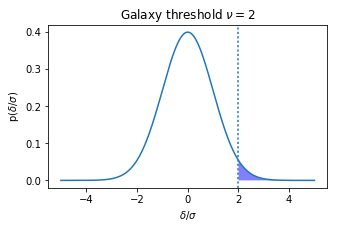

In [3]:
if show_plot:
    d = np.linspace(-5,5,1000)
    pdf = norm.pdf(d)
    plt.plot(d,pdf)
    above=(d>nu)
    plt.fill_between(d[above],0,pdf[above], facecolor='blue', alpha=0.5)
    plt.axvline(x=nu,ls=':')
    plt.xlabel('$\\delta/\\sigma$')
    plt.ylabel('p($\\delta/\\sigma$)')
    plt.title('Galaxy threshold $\\nu='+str(nu)+'$')
    plt.savefig('pdf_galaxy_nu_2.pdf')

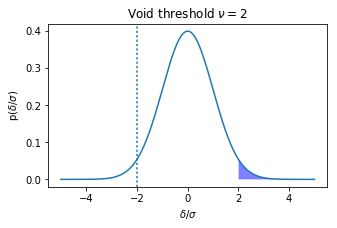

In [4]:
#Void PDF
if show_plot:
    d = np.linspace(-5,5,1000)
    pdf = norm.pdf(d)
    plt.plot(d,pdf)
    below=(d<-nu)
    plt.fill_between(d[above],0,pdf[above], facecolor='blue', alpha=0.5)
    plt.axvline(x=-nu,ls=':')
    plt.xlabel('$\\delta/\\sigma$')
    plt.ylabel('p($\\delta/\\sigma$)')
    plt.title('Void threshold $\\nu='+str(nu)+'$')
    plt.savefig('pdf_void_nu_2.pdf')

### Lower threshold (galaxies at delta > nu)

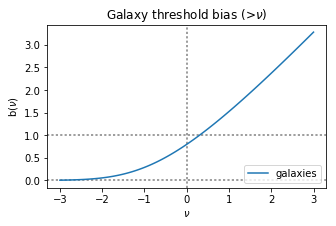

In [5]:
# explore different values of nu
nu=np.linspace(-3,3,100)
# probability density at the threshold
p_nu = norm.pdf(nu)
# density of galaxies is equal to the fraction of cells with density above the threshold 
galaxy_mean = 1.0-norm.cdf(nu)
if show_plot:
    galaxy_bias = p_nu / galaxy_mean
    plt.axhline(y=1,ls=':',color='gray') 
    plt.axhline(y=0,ls=':',color='gray')     
    plt.axvline(x=0,ls=':',color='gray') 
    plt.plot(nu,galaxy_bias,label='galaxies')
    plt.xlabel('$\\nu$')
    plt.ylabel('b($\\nu$)')
    plt.legend(loc='lower right')
    plt.title('Galaxy threshold bias (>$\\nu$)')
    plt.savefig('bias_galaxy.pdf')

### Upper threshold (delta < nu to have a void)

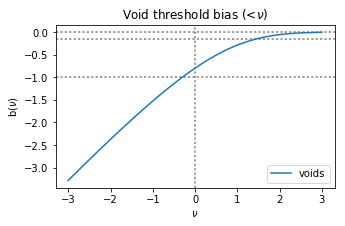

In [6]:
# density of voids is equal to the fraction of cells with density above the threshold 
void_mean = norm.cdf(nu)
if show_plot:
    void_bias = - p_nu / void_mean
    plt.axhline(y=-1,ls=':',color='gray') 
    plt.axhline(y=-0.15,ls=':',color='gray') 
    plt.axhline(y=0.0,ls=':',color='gray') 
    plt.axvline(x=0,ls=':',color='gray') 
    plt.plot(nu,void_bias,label='voids')
    plt.xlabel('$\\nu$')
    plt.ylabel('b($\\nu$)')
    plt.legend(loc='lower right')
    plt.title('Void threshold bias (<$\\nu$)')
    plt.savefig('bias_void.pdf')